<a href="https://www.kaggle.com/code/rabiababar/heart-disease?scriptVersionId=106739313" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Cardiovascular Disease Prediction using Logistic Regression

* Classification Algorithms: Logistic Regression
* Performance Metrics:  
    Accuracy,
    Recall, 
    Precision, 
    F1 score,
    AUC

Logistic Regression is a supervised method. It is used for predicting the probability of a dependent or a target variable. Using Logistic Regression, we can predict and establish relationships between dependent and one or more independent variables.

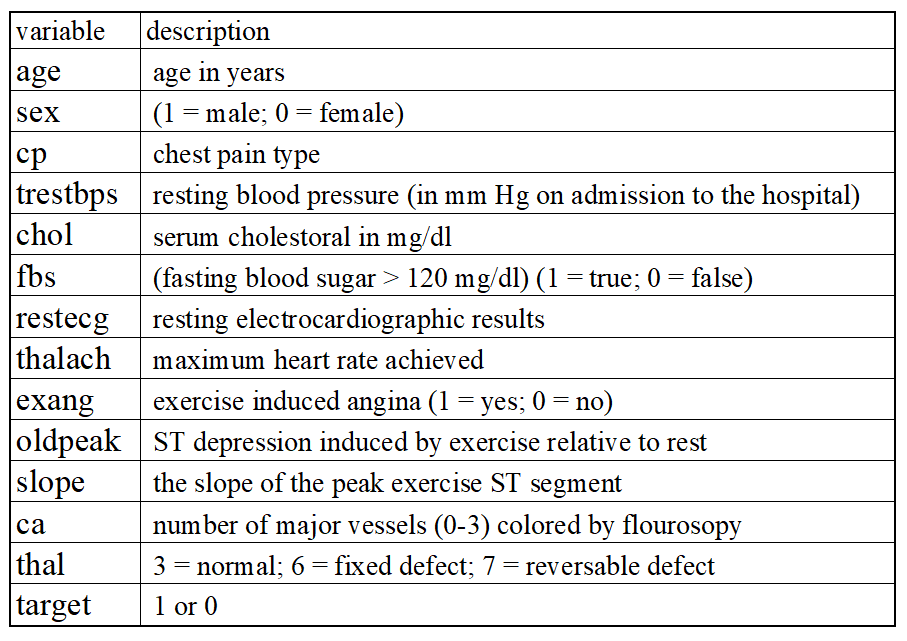

# EDA

### Loading libraries and importing data

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/cardio-disease/data.xlsx


In [2]:
filepath = "/kaggle/input/cardio-disease/data.xlsx"
df=pd.read_excel(filepath)
dcomp=df

In [3]:
df.shape

(303, 14)

In [4]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


### Structure of Data

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Missing Values

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing value found

### Droping duplicates

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(302, 14)

One row dropped

### Statistical summary of data

In [9]:
df.describe(include = 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Categorical variables in dataset are:
    1.Sex
    2.CP (Chest Pain Type)
    3.fbs (Fasting Blood Sugar)
    4.restecg (Resting Electrocardiographic results)
    5.exang (Excercise Induced Angina)
    6.slope (Peak Excercise ST Segment)
    7.ca (Number of major vessels colored by Flouroscopy)
    8.thal (normal, fixed defect, reverseble defect)
    

In [10]:
dt=df
dt['target'][dt['target'] == 0] = 'No Disease'
dt['target'][dt['target'] == 1] = 'Heart Disease'

dt['sex'][dt['sex'] == 0] = 'female'
dt['sex'][dt['sex'] == 1] = 'male'

dt['fbs'][dt['fbs'] == 0] = 'lower than 120mg/ml'
dt['fbs'][dt['fbs'] == 1] = 'greater than 120mg/m'

dt['exang'][dt['exang'] == 0] = 'No'
dt['exang'][dt['exang'] == 1] = 'Yes'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7

In [11]:
dt.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,greater than 120mg/m,0,150,No,2.3,0,0,1,Heart Disease


# Count Plots of Categorical Variables

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(dt))

<Figure size 576x360 with 0 Axes>

### Gender

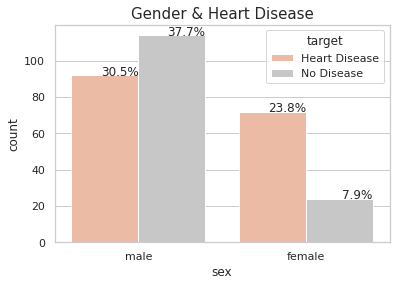

In [13]:
ax = sns.countplot(x="sex", hue="target", data=dt, palette = "RdGy")
plt.title('Gender & Heart Disease', fontsize=15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

In above chart 30.5 % males have heart disease whereas 23.8 % females have heart disease

### CP (Chest Pain Type)

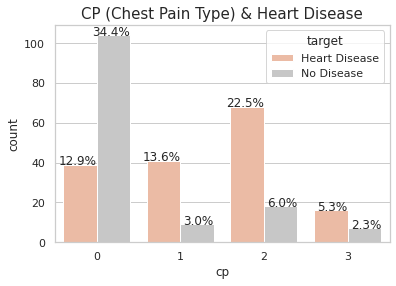

In [14]:
ax = sns.countplot(x="cp", hue="target", data=dt, palette = "RdGy")
plt.title('CP (Chest Pain Type) & Heart Disease', fontsize=15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

Patients with Type2 Chest Pain have more chances of having Heart Disease

### Fbs (Fasting Blood Sugar) 

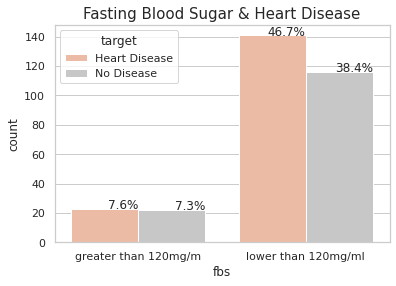

In [15]:
ax = sns.countplot(x="fbs", hue="target", data=dt, palette = "RdGy")
plt.title('Fasting Blood Sugar & Heart Disease', fontsize=15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

Patients with Fasting Blood Sugar lower than 120mg/ml have more chances of Heart Disease

### Restecg (Resting Electrocardiographic results)

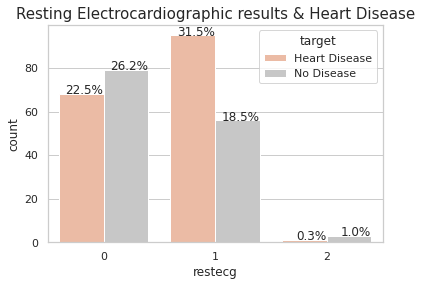

In [16]:
ax = sns.countplot(x="restecg", hue="target", data=dt, palette = "RdGy")
plt.title('Resting Electrocardiographic results & Heart Disease', fontsize=15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

Patients with Resting Electrocardiographic results of Level 1 have more chances of Heart Disease

### Exang (Excercise Induced Angina)

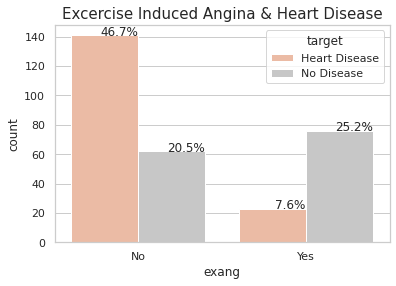

In [17]:
ax = sns.countplot(x="exang", hue="target", data=dt, palette = "RdGy")
plt.title('Excercise Induced Angina & Heart Disease', fontsize=15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

More people have Heart Disease when its not Exercise Induced Amgina

### Slope (Peak Excercise ST Segment)

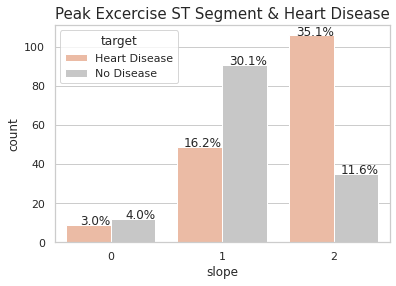

In [18]:
ax = sns.countplot(x="slope", hue="target", data=dt, palette = "RdGy")
plt.title('Peak Excercise ST Segment & Heart Disease', fontsize=15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

At slope level 2 more people have heart disease

### ca (Number of major vessels colored by Flouroscopy) 

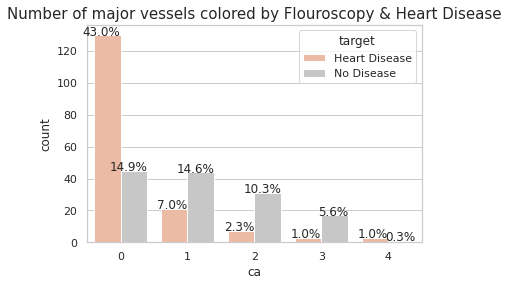

In [19]:
ax = sns.countplot(x="ca", hue="target", data=dt, palette = "RdGy")
plt.title('Number of major vessels colored by Flouroscopy & Heart Disease', fontsize=15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

When 0 vessels are colored 43% chances are of Heart Disease

### thal (normal, fixed defect, reverseble defect) 

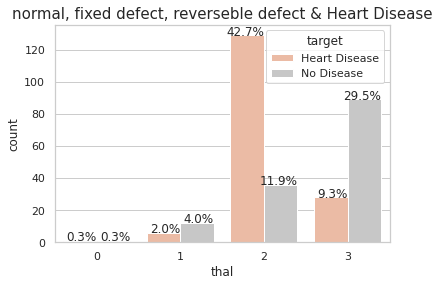

In [20]:
ax = sns.countplot(x="thal", hue="target", data=dt, palette = "RdGy")
plt.title('normal, fixed defect, reverseble defect & Heart Disease', fontsize=15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

Text(0, 0.5, 'Count')

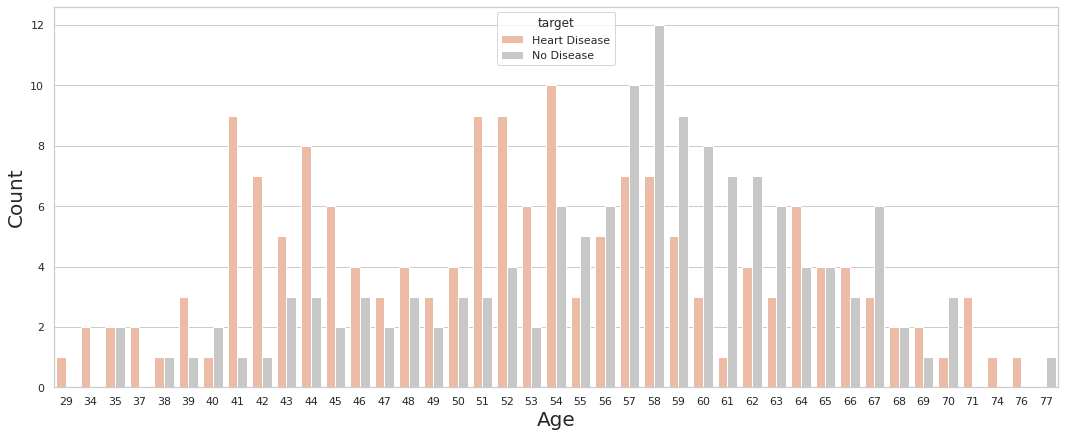

In [21]:
plt.figure(figsize = (18,7))
sns.countplot(x = 'age',hue='target', data  = dt, palette = "RdGy")
plt.xlabel("Age", size = 20)
plt.ylabel("Count", size = 20)

More chances of Heart Disease at Age bracket (41-45) and (51-53)

# Pairplot

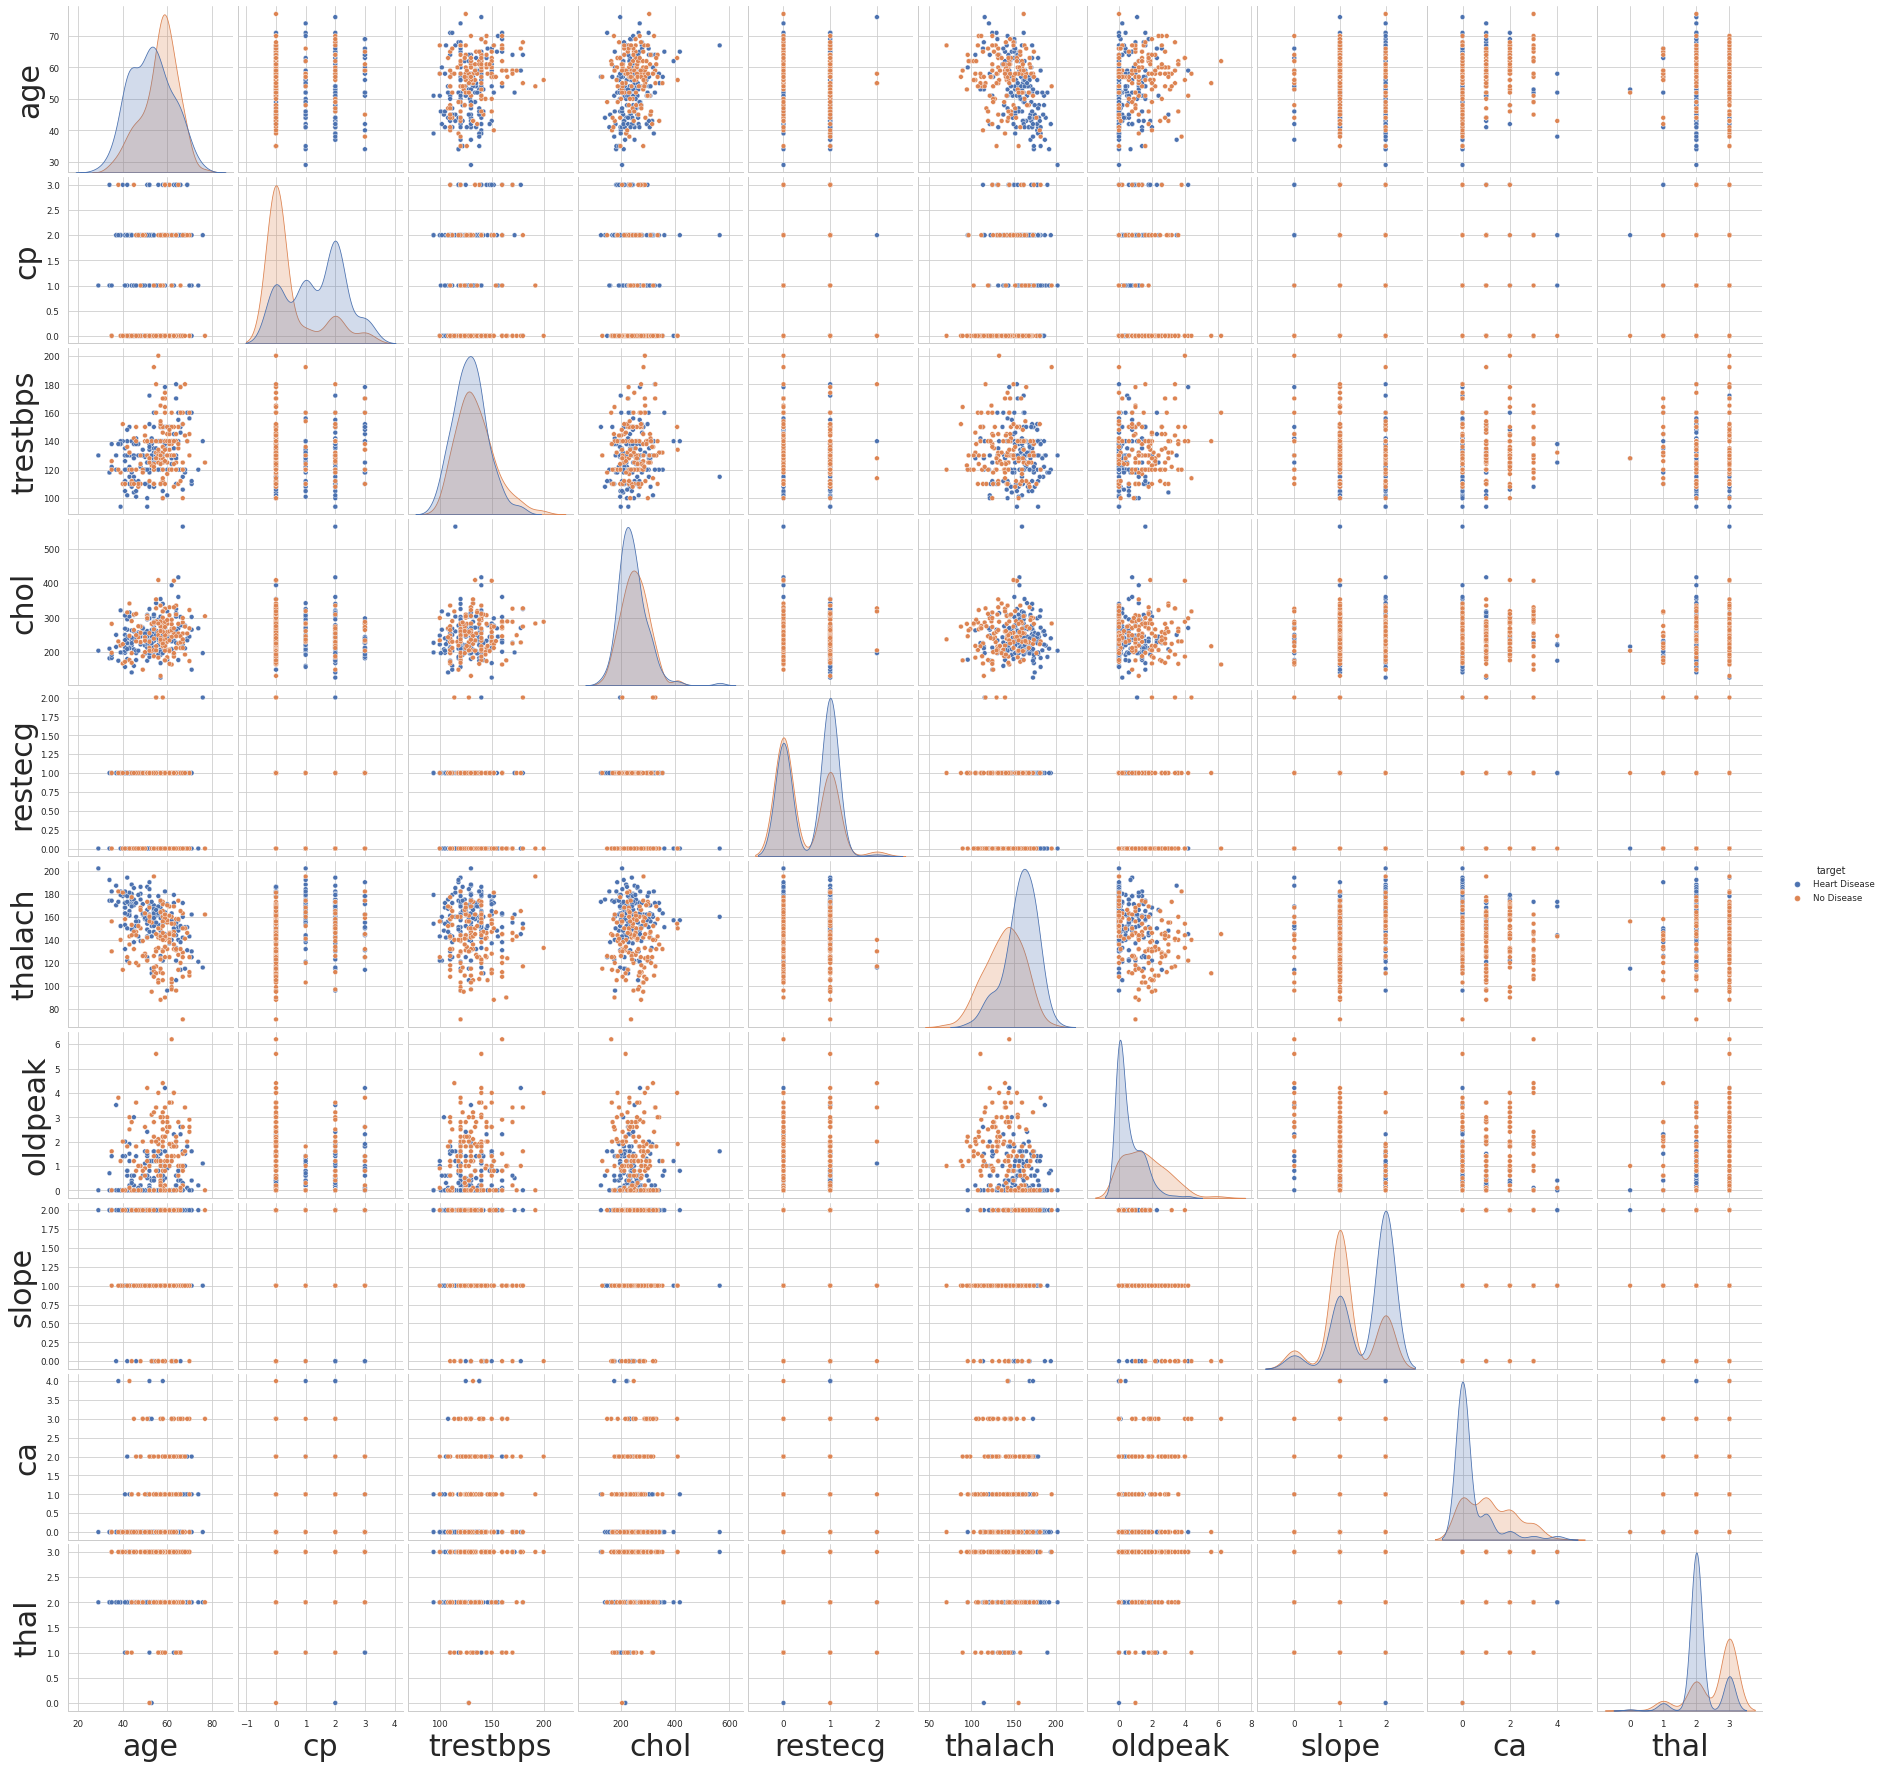

In [22]:
sns.set_context("paper", rc={"axes.labelsize":30})
gfg=sns.pairplot(df, diag_kind = 'kde', hue = 'target')


# Feature Engineering

In [23]:
filepath = "/kaggle/input/cardio-disease/data.xlsx"
df=pd.read_excel(filepath)
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
df['Age Bracket'] =df['age'].astype(float)
df['age']=df['age'].astype(float)

df['BP range'] =df['trestbps'].astype(float)
df['trestbps']=df['trestbps'].astype(float)

df['Cholestrol Level'] =df['chol'].astype(float)
df['chol']=df['chol'].astype(float)

df['Heart Rate Achieved'] =df['thalach'].astype(float)
df['thalach']=df['thalach'].astype(float)

df['ST Depression Level'] =df['oldpeak'].astype(float)
df['oldpeak']=df['oldpeak'].astype(float)

In [25]:
#Categorizing Age Brackets
df['Age Bracket'][(df['age'] >= 20) & (df['age'] <= 30) ] = '20-30'
df['Age Bracket'][(df['age'] >= 31) & (df['age'] <= 40) ] = '31-40'
df['Age Bracket'][(df['age'] >= 41) & (df['age'] <= 50) ] = '41-50'
df['Age Bracket'][(df['age'] >= 51) & (df['age'] <= 60) ] = '51-60'
df['Age Bracket'][(df['age'] >= 61) & (df['age'] <= 70) ] = '61-70'
df['Age Bracket'][(df['age'] >= 71) ] = 'Greater than 71'

#Categorizing Blood Pressure
df['BP range'][(df['trestbps'] >= 80)  & (df['trestbps'] <= 100) ] = '80-100'
df['BP range'][(df['trestbps'] >= 101) & (df['trestbps'] <= 120) ] = '101-120'
df['BP range'][(df['trestbps'] >= 121) & (df['trestbps'] <= 140) ] = '121=140'
df['BP range'][(df['trestbps'] >= 141) & (df['trestbps'] <= 160) ] = '141-160'
df['BP range'][(df['trestbps'] >= 161) & (df['trestbps'] <= 180) ] = '160-180'
df['BP range'][(df['trestbps'] >= 181)] = 'Greater than 180'


#Categorizing Cholestrol levels
df['Cholestrol Level'][(df['chol'] >= 120)  & (df['chol'] <= 180) ] = '120-180'
df['Cholestrol Level'][(df['chol'] >= 181)  & (df['chol'] <= 240) ] = '181-240'
df['Cholestrol Level'][(df['chol'] >= 241)  & (df['chol'] <= 300) ] = '241-300'
df['Cholestrol Level'][(df['chol'] >= 301)  & (df['chol'] <= 360) ] = '301-360'
df['Cholestrol Level'][(df['chol'] >= 361)  & (df['chol'] <= 420) ] = '361-420'
df['Cholestrol Level'][(df['chol'] >= 421)  & (df['chol'] <= 480) ] = '421-480'
df['Cholestrol Level'][(df['chol'] >= 481)  & (df['chol'] <= 540) ] = '481-540'
df['Cholestrol Level'][(df['chol'] >= 541)] = 'Greater than 540'

#Categorizing Heart Rate levels
df['Heart Rate Achieved'][(df['thalach'] >= 50)  & (df['thalach'] <= 100) ] = '50-100'
df['Heart Rate Achieved'][(df['thalach'] >= 101)  & (df['thalach'] <= 150) ] = '101-150'
df['Heart Rate Achieved'][(df['thalach'] >= 151)  & (df['thalach'] <= 200) ] = '151-200'
df['Heart Rate Achieved'][(df['thalach'] >= 201)] = 'Greater than 200'

#Categorizing ST Depression levels
df['ST Depression Level'][(df['oldpeak'] >= 0)  & (df['oldpeak'] <= 2) ] = '0-2'
df['ST Depression Level'][(df['oldpeak'] >= 2.01)  & (df['oldpeak'] <= 4) ] = '2.01-4'
df['ST Depression Level'][(df['oldpeak'] >= 4.01)  & (df['oldpeak'] <= 6) ] = '4.01-6'
df['ST Depression Level'][(df['oldpeak'] >= 6.01) ] = 'Greater than 6.01'


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [26]:
df.head(1)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age Bracket,BP range,Cholestrol Level,Heart Rate Achieved,ST Depression Level
0,63.0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1,61-70,141-160,181-240,101-150,2.01-4


In [27]:
df.pop('age')
df.pop('trestbps')
df.pop('chol')
df.pop('thalach')
df.pop('oldpeak')
df.head(1)


,sex,cp,fbs,restecg,exang,slope,ca,thal,target,Age Bracket,BP range,Cholestrol Level,Heart Rate Achieved,ST Depression Level
0,1,3,1,0,0,0,0,1,1,61-70,141-160,181-240,101-150,2.01-4


# One Hot encoding for categorical varaibles

In [28]:
df_OneHot = pd.get_dummies(
    df, columns=['Age Bracket', 'sex', 'cp', 'BP range', 'Cholestrol Level', 'fbs', 'restecg','Heart Rate Achieved','exang', 'ST Depression Level','slope', 'ca', 'thal'])
df_OneHot.head(1)

,target,Age Bracket_20-30,Age Bracket_31-40,Age Bracket_41-50,Age Bracket_51-60,Age Bracket_61-70,Age Bracket_Greater than 71,sex_0,sex_1,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [29]:
df = df_OneHot.copy()

# Creating Independent and Dependent Variables

In [30]:
X = df.drop(['target'], axis=1)
Y = df['target']

In [31]:
print("X:", X.shape)
print("Y:", Y.shape)

X: (303, 51)
Y: (303,)


# Train Test n Split the data

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, test_size=0.3, random_state=25, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(212, 51) (212,)
(91, 51) (91,)


In [34]:
xtrain.head()

,Age Bracket_20-30,Age Bracket_31-40,Age Bracket_41-50,Age Bracket_51-60,Age Bracket_61-70,Age Bracket_Greater than 71,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
78,0,0,0,1,0,0,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
296,0,0,0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
0,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
134,0,0,1,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
100,0,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0


# Creating Logistic Regression Model & Training

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr_model = LogisticRegression(random_state=25)

In [37]:
lr_model.fit(xtrain, ytrain)

LogisticRegression(random_state=25)

#  Evaluation

In [38]:
pred = lr_model.predict(xtest)

In [39]:
pred[0:20]

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

### Predicting prabability of **0** and **1**

In [40]:
pred_prb = lr_model.predict_proba(xtest)

In [41]:
pred_prb[0:9, 0:9]

array([[0.53905002, 0.46094998],
       [0.128694  , 0.871306  ],
       [0.18087562, 0.81912438],
       [0.95469095, 0.04530905],
       [0.04067131, 0.95932869],
       [0.04992289, 0.95007711],
       [0.39299742, 0.60700258],
       [0.95900077, 0.04099923],
       [0.19301174, 0.80698826]])

In [42]:
lr_pred_prb = lr_model.predict_proba(xtest)[:, 1]

# Comparison of Predicted and Actual

In [43]:
xtest.head()

,Age Bracket_20-30,Age Bracket_31-40,Age Bracket_41-50,Age Bracket_51-60,Age Bracket_61-70,Age Bracket_Greater than 71,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
281,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,0
81,0,0,1,0,0,0,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
40,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
175,0,1,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
58,0,1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [44]:
xt = xtest.copy()
xt['pred'] = pred
xt['pred_probability'] = lr_pred_prb
xt['actual'] = ytest
xt.head(10)

,Age Bracket_20-30,Age Bracket_31-40,Age Bracket_41-50,Age Bracket_51-60,Age Bracket_61-70,Age Bracket_Greater than 71,sex_0,sex_1,cp_0,cp_1,...,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,pred,pred_probability,actual
281,0,0,0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0.460950,0
81,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0.871306,1
40,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0.819124,1
175,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0.045309,0
58,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0.959329,1
105,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0.950077,1
222,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0.607003,0
251,0,0,1,0,0,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0.040999,0
153,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0.806988,1
149,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0.933786,1


# Confusion Matrix  

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(ytest, pred)

array([[32,  8],
       [ 6, 45]])

In [47]:
confusion_matrix(ytest, pred).ravel()

array([32,  8,  6, 45])

In [48]:
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix = pd.DataFrame({"pred_Heart Disease": [tp, fp], "pred_No Heart Disease": [
                           fn, tn]}, index=["Heart Disease", "No Heart Disease"])
conf_matrix

,pred_Heart Disease,pred_No Heart Disease
Heart Disease,45,6
No Heart Disease,8,32


# Accuracy

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy = (tp + tn) / (tp + fp + tn + fn)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8461538461538461


In [51]:
accuracy_lr = accuracy_score(ytest, pred)
print("Accuracy by built-in function: {}".format(accuracy_lr))

Accuracy by built-in function: 0.8461538461538461


# Precision

Precision is based on predicitions within the class

In [52]:
from sklearn.metrics import precision_score

In [53]:
precision_1 = tp / (tp + fp)
print("Precision for 1: {}".format(precision_1))
precision_0 = tn / (tn + fn)
print("Precision for 0: {}".format(precision_0))

Precision for 1: 0.8490566037735849
Precision for 0: 0.8421052631578947


In [54]:

precision_lr = precision_score(ytest, pred)
print("Precision by built-in function: {}".format(precision_lr))

Precision by built-in function: 0.8490566037735849


# Recall

Recall is based on actual labels

In [55]:
from sklearn.metrics import recall_score

In [56]:
recall_1 = tp / (tp + fn)
print("Recall for 1: {}".format(recall_1))
recall_0 = tn / (tn + fp)
print("Recall for 0: {}".format(recall_0))

Recall for 1: 0.8823529411764706
Recall for 0: 0.8


In [57]:
recall_lr = recall_score(ytest, pred)
print("Recall by built-in function: {}".format(recall_lr))

Recall by built-in function: 0.8823529411764706


# F1 Score

F1 score is the Harmonic Mean of Precision and Recall and always goes towards smaller value

In [58]:
from sklearn.metrics import f1_score

In [59]:
f1_1 = (2 * precision_1 * recall_1) / (precision_1 + recall_1)
print("F1 Score for 1: {}".format(f1_1))
f1_0 = (2 * precision_0 * recall_0) / (precision_0 + recall_0)
print("F1 Score for 0: {}".format(f1_0))

F1 Score for 1: 0.8653846153846154
F1 Score for 0: 0.8205128205128205


In [60]:
f1_lr = f1_score(ytest, pred)
print("F1 Score by built-in function: {}".format(f1_lr))

F1 Score by built-in function: 0.8653846153846154


# Class Distribution in Training Data

In [61]:
from sklearn.metrics import classification_report

In [62]:
# get report of precision recall and f1 score
print(classification_report(ytest, pred))
# macro avg

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        40
           1       0.85      0.88      0.87        51

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



# ROC AUC Curve

_Receiver Operating Characteristic_ & _Area Under Curve_

**True Positive Rate** = True Positive **/** All Positives

**False Positive Rate** = False Positive **/** All Negatives

In [63]:
tpr = recall_lr
fpr = fp / (fp + tn)

In [64]:
tpr, fpr

(0.8823529411764706, 0.2)

In [65]:
fpr = 1 - recall_0
tpr, fpr

(0.8823529411764706, 0.19999999999999996)

Defining function to plot ROC AUC Curve

In [66]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

In [67]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

Getting TPR, FPR values for each threshold on ROC AUC Curve

In [68]:
fpr, tpr, threshold = roc_curve(ytest, lr_pred_prb)

Calculating AUC score from ytest and predicted probabilities

In [69]:
auc_lr = roc_auc_score(ytest, lr_pred_prb)
auc_lr

0.9215686274509804

Plotting AUC ROC Curve

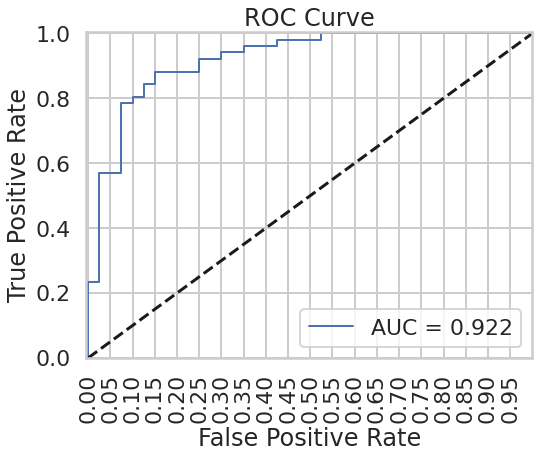

In [70]:
sns.set_context('poster')
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_lr)

AUC = 0.922, which indicates maximum area under the curve and is shows that the model is good at correctly classifying observations into categories.